Bayu Sulistiyawan

Submission Dicoding Machine Learning Pemula

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [2]:
print(tf.__version__)

2.4.1


In [3]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-05-09 08:14:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.14MB/s    in 4m 6s   

2021-05-09 08:18:50 (1.25 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (128 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

In [7]:
!tree -d /tmp

/tmp
├── initgoogle_syslog_dir.0
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── scissors

18 directories


In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [8]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [9]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [10]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [11]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [12]:
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [13]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [14]:
!tree -d /tmp

/tmp
├── initgoogle_syslog_dir.0
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── paper
    │   ├── rock
    │   └── scissors
    ├── scissors
    ├── train
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── val
        ├── paper
        ├── rock
        └── scissors

26 directories


In [23]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
     train_generator,
    steps_per_epoch = 41, 
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, 
    verbose =2,
      callbacks=[callbacks]
)

model.save("rockpaperscissors.h5")


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)            

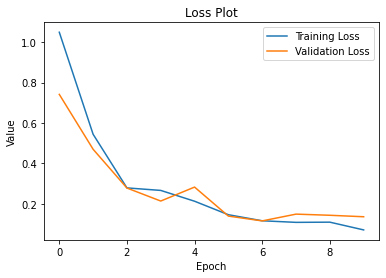

In [37]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

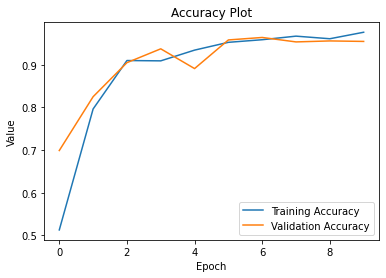

In [38]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving Screenshot_177.png to Screenshot_177.png
Screenshot_177.png
paper


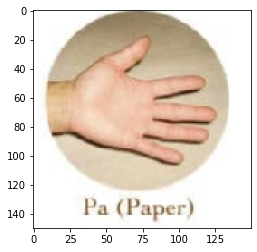

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')